In [15]:
import sys
import os
sys.path.append(os.path.abspath("/Users/dilankaraguler/Desktop"))
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG
from ND_north_star.src.samplers.sample_function import sample_coords_and_values


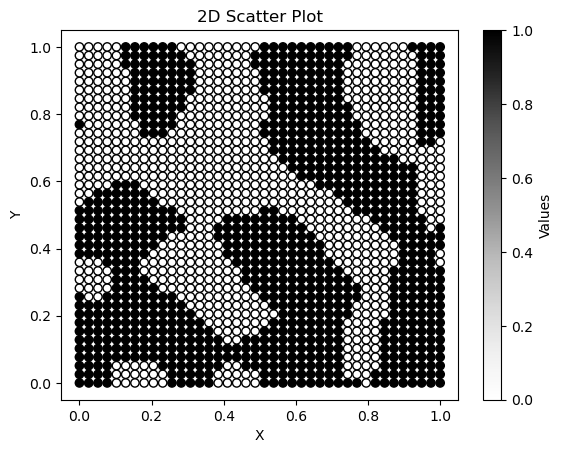

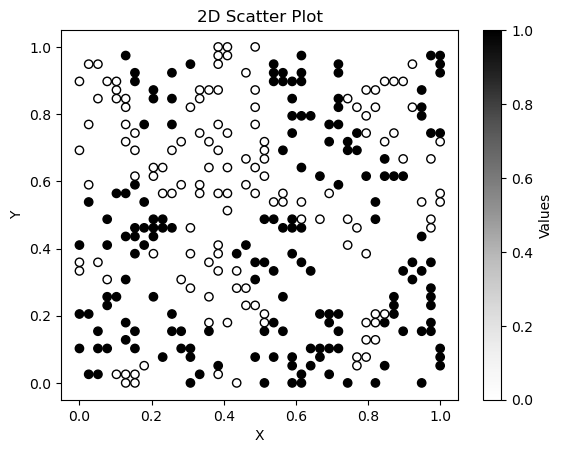

In [16]:
resolution = 40
dimensions = [resolution, resolution]

coord_array, values = PNG.normalized_perlin_coord_values(dimensions, 4)
PNG.plot_perlin_2D_3D(coord_array, values, 'black')

sampled_coord, sampled_values = sample_coords_and_values(coord_array, values, 300)
PNG.plot_perlin_2D_3D(sampled_coord, sampled_values, 'black')

#sampled_coord, sampled_values = sample_coords_and_values(coord_array, values, 300, method='lhs')
#PNG.plot_perlin_2D_3D(sampled_coord, sampled_values, 'black')

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
import gudhi as gd
print(gd.__version__)

3.9.0


In [18]:
len(sampled_values)
black_dot_x=sampled_coord[0][sampled_values==1]
black_dot_y=sampled_coord[1][sampled_values==1]
black_dots= [black_dot_x,black_dot_y]

white_dot_x=sampled_coord[0][sampled_values==0]
white_dot_y=sampled_coord[1][sampled_values==0]
white_dots= [white_dot_x,white_dot_y]


In [33]:

black_points = np.array(black_dots).T  # Ensure sampled_coord is a numpy array

# Compute persistent homology using Ripser
diagrams_black = ripser(black_points)['dgms']
life_spans_black=diagrams_black[1][:,1]-diagrams_black[1][:,0]
life_spans_black


white_points = np.array(white_dots).T  # Ensure sampled_coord is a numpy array

# Compute persistent homology using Ripser
diagrams_white = ripser(white_points)['dgms']
life_spans_white =diagrams_white[1][:,1]-diagrams_white[1][:,0]
life_spans_white


#diagrams is a list of 0th homology group generator = diagrams[0] and 1st homology group generators = diagrams[1]

array([0.03259653, 0.01847318, 0.04037848, 0.02967402, 0.00985198,
       0.03343859, 0.00253895, 0.0089495 , 0.00622156, 0.01011407,
       0.02463661, 0.01136599, 0.02463661, 0.03358611, 0.00439931,
       0.00439931, 0.00439931, 0.00439931, 0.02374897, 0.05733507,
       0.00605302, 0.01062086, 0.01062086])

Text(0, 0.5, 'Death')

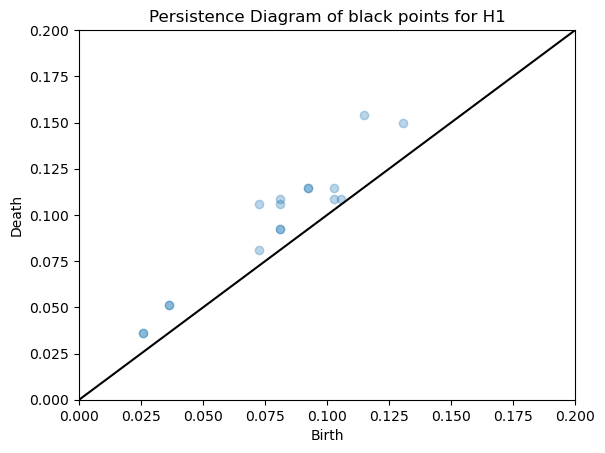

In [20]:
plt.scatter(diagrams_black[1][:,0],diagrams_black[1][:,1],alpha=0.3)
plt.xlim([0, 0.2])
plt.ylim([0, 0.2])
plt.axline((0, 0), slope=1, color='k')
plt.title('Persistence Diagram of black points for H1')
plt.xlabel('Birth')
plt.ylabel('Death')

Text(0, 0.5, 'Death')

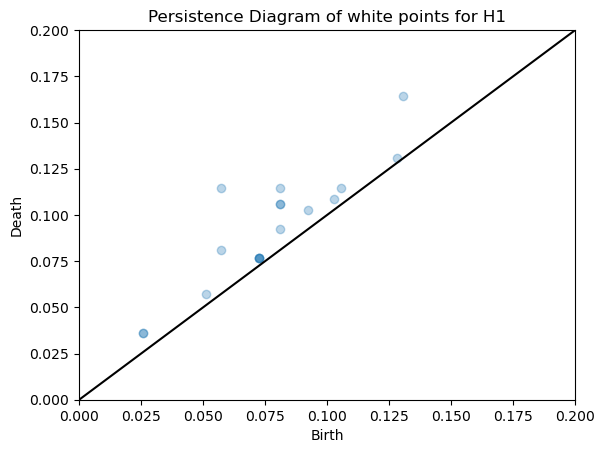

In [21]:
plt.scatter(diagrams_white[1][:,0],diagrams_white[1][:,1],alpha=0.3)
plt.xlim([0, 0.2])
plt.ylim([0, 0.2])
plt.axline((0, 0), slope=1, color='k')
plt.title('Persistence Diagram of white points for H1')
plt.xlabel('Birth')
plt.ylabel('Death')

Now we need locational information of the simplexes that forms these classes.

In [38]:
rips_complex_black = gd.RipsComplex(points=black_dots, max_edge_length=0.2)
simplex_tree_black = rips_complex_black.create_simplex_tree(max_dimension=2)

In [39]:
# List to hold coordinates forming 1-simplices with short life
short_life_coords = []
short_life_threshold = 1 
# Iterate over simplices in the simplex tree
for simplex, filtration in simplex_tree_black.get_filtration():
    print(simplex, filtration)
    if len(simplex) == 2:  # We are interested in 1-simplices (edges)
        birth = filtration
        death = simplex_tree_black.persistence_intervals_in_dimension(1)
        for interval in death:
            if interval[0] == birth and interval[1] - interval[0] < short_life_threshold:
                p1, p2 = simplex
                short_life_coords.append(black_points[p1])
                short_life_coords.append(black_points[p2])

# Convert short_life_coords to numpy array for plotting
short_life_coords = np.array(short_life_coords)

[0] 0.0
[1] 0.0


In [40]:
# Compute persistent homology before iterating over edges
simplex_tree_black.compute_persistence()

# Get persistence intervals for edges
death = simplex_tree_black.persistence_intervals_in_dimension(1)

# Iterate over edges in the simplex tree
for edge in simplex_tree_black.get_skeleton(1):
    vertices = edge[0]  # Extract vertices of the edge
    filtration = edge[1]  # Filtration value of the edge
    print("Edge:", vertices)
    print("Birth:", filtration)
    print("Death:", death)
    for interval in death:
        print("Interval:", interval)
        if interval[0] == filtration and interval[1] - interval[0] < short_life_threshold:
            p1, p2 = vertices
            short_life_coords.append(black_points[p1])
            short_life_coords.append(black_points[p2])

# Convert short_life_coords to numpy array for plotting
short_life_coords = np.array(short_life_coords)
print("Short-lived coordinates:", short_life_coords)


Edge: [0]
Birth: 0.0
Death: []
Edge: [1]
Birth: 0.0
Death: []
Short-lived coordinates: []


In [ ]:
# Convert sampled coordinates to numpy array and transpose
points = np.array(sampled_coord).T  # Ensure sampled_coord is a numpy array

# Compute persistent homology using Ripser
diagrams = ripser(points)['dgms']

diagrams


[array([[0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.        , 0.02564103],
        [0.   

In [ ]:

points = np.array(sampled_coord).T  # Ensure sampled_coord is a numpy array
points = points.T  # Transpose to shape (300, 2)

# Compute persistent homology using Ripser
diagrams = ripser(points)['dgms']

# Plot persistence diagrams to debug
plot_dgms(diagrams, show=True)

# Extract Betti-1 features
betti1_features = diagrams[1]

# Define a threshold for short-lived features
short_life_threshold = 0.1  # Adjust based on your criteria

# Identify short-lived Betti-1 features
short_lived_betti1 = [feature for feature in betti1_features if feature[1] - feature[0] < short_life_threshold]

print("Short-lived Betti-1 features:")
for feature in short_lived_betti1:
    print(feature)

# Using Gudhi to construct Rips complex and find 1-simplices
rips_complex = gd.RipsComplex(points=points, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# List to hold coordinates forming 1-simplices with short life
short_life_coords = []

# Iterate over simplices in the simplex tree
for simplex, filtration in simplex_tree.get_filtration():
    if len(simplex) == 2:  # We are interested in 1-simplices (edges)
        p1, p2 = simplex
        short_life_coords.append(points[p1])
        short_life_coords.append(points[p2])

# Convert short_life_coords to numpy array for plotting
short_life_coords = np.array(short_life_coords)

# Print coordinates for debugging
print("Coordinates forming short-lived 1-simplices:")
print(short_life_coords)

# Check if short_life_coords is empty
if short_life_coords.size == 0:
    print("No short-lived Betti-1 features found.")
else:
    # Plot the points forming short-lived 1-simplices
    PNG.plot_perlin_2D_3D(short_life_coords, np.ones(len(short_life_coords)), 'black')


/opt/anaconda3/lib/python3.11/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


NameError: name 'plot_dgms' is not defined